In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
import copy
from sklearn.preprocessing import LabelEncoder
%matplotlib inline 
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import zscore

In [2]:
data = pd.read_excel("with_DesignationFilter.xlsx")
print(data.shape)

(219, 12)


In [3]:
data.head(10)

,Useless,EMP.NO,Employee name,Designation,DOJ,Basic,Spl.Alw,T.Gross21,T.Gross20,T.Gross19,T.Gross18,T.Gross17
0,0,1002,Sai Sarma K L N S,General Manager,04.08.2006,115441.0,50006.0,211623.01,187189.01,187189.01,168678.0,150608.01
1,1,1047,Seshagiri Rao N,Vice President,13.12.2010,177158.0,87132.0,335153.01,264831.01,264831.01,199918.0,162619.01
2,2,2210,Premnadh Tedla,Deputy General Manager,21.08.2008,114383.0,33827.0,218963.01,203385.01,203385.01,163961.0,174362.01
3,17,2426,T.M.Devaiah,General Manager,01.12.2009,88370.0,57390.0,181108.01,164643.01,164643.01,149675.0,136068.01
4,21,2435,Gurudas Mesta,Assistant General Manager,16.12.2010,89328.0,42877.0,167936.01,158430.01,158430.01,140204.0,127458.01
5,45,20086,Pradeep Kumar Gupta,Senior General Manager,05.10.2018,89583.0,34450.0,159866.00,159866.00,162366.00,0.0,0.00
6,47,1079,Ramprasad Nori,Associate Vice President,14.09.2016,183571.0,110099.0,367098.00,316698.00,316698.00,260698.0,212782.00
7,60,7049,Srinivasa Naidu Ankamreddy,Senior General Manager,05.08.2010,193667.0,67749.0,365725.01,324777.01,324777.01,253426.0,247235.01
8,68,20181,K. Rama Mohana Rao,Deputy General Manager,15.04.2019,74583.0,35800.0,140216.00,140216.00,74781.86,0.0,0.00
9,80,6091,Amarnath P.,Assistant General Manager,24.09.2015,99602.0,59685.0,199128.00,172920.00,172920.00,143800.0,126950.00


In [4]:
mydata = data.drop(columns = 'Useless')

In [5]:
mydata

,EMP.NO,Employee name,Designation,DOJ,Basic,Spl.Alw,T.Gross21,T.Gross20,T.Gross19,T.Gross18,T.Gross17
0,1002,Sai Sarma K L N S,General Manager,04.08.2006,115441.0,50006.0,211623.01,187189.01,187189.01,168678.0,150608.01
1,1047,Seshagiri Rao N,Vice President,13.12.2010,177158.0,87132.0,335153.01,264831.01,264831.01,199918.0,162619.01
2,2210,Premnadh Tedla,Deputy General Manager,21.08.2008,114383.0,33827.0,218963.01,203385.01,203385.01,163961.0,174362.01
3,2426,T.M.Devaiah,General Manager,01.12.2009,88370.0,57390.0,181108.01,164643.01,164643.01,149675.0,136068.01
4,2435,Gurudas Mesta,Assistant General Manager,16.12.2010,89328.0,42877.0,167936.01,158430.01,158430.01,140204.0,127458.01
...,...,...,...,...,...,...,...,...,...,...,...
214,21302,Man Bahadur,Assistant General Manager,08.08.2018,68297.0,39177.0,134793.00,124675.00,118886.00,0.0,0.00
215,37202,Mandapati Thirumala Raju,Associate Vice President,09.01.2019,141250.0,67800.0,265550.00,282500.00,282500.00,0.0,0.00
216,1006,Srinivasa Rao Peddeti,Deputy General Manager,02.04.2007,62375.0,31808.0,119133.01,91641.01,91641.01,79688.0,69908.01
217,4449,P.V.N.Suryanarayana Rao,Assistant General Manager,05.10.2007,70834.0,28099.0,133167.00,87733.00,87733.00,74862.0,62125.00


In [6]:
Inc_perc = ((mydata['T.Gross21'] - mydata['T.Gross17'])/ mydata['T.Gross17']) * 100
comission_perc = pd.DataFrame(Inc_perc)
comission_perc

,0
0,40.512453
1,106.097067
2,25.579540
3,33.101094
4,31.757910
...,...
214,inf
215,inf
216,70.413963
217,114.353320


In [7]:
mydata['Comission%_ovr_4yrs'] = comission_perc
mydata

,EMP.NO,Employee name,Designation,DOJ,Basic,Spl.Alw,T.Gross21,T.Gross20,T.Gross19,T.Gross18,T.Gross17,Comission%_ovr_4yrs
0,1002,Sai Sarma K L N S,General Manager,04.08.2006,115441.0,50006.0,211623.01,187189.01,187189.01,168678.0,150608.01,40.512453
1,1047,Seshagiri Rao N,Vice President,13.12.2010,177158.0,87132.0,335153.01,264831.01,264831.01,199918.0,162619.01,106.097067
2,2210,Premnadh Tedla,Deputy General Manager,21.08.2008,114383.0,33827.0,218963.01,203385.01,203385.01,163961.0,174362.01,25.579540
3,2426,T.M.Devaiah,General Manager,01.12.2009,88370.0,57390.0,181108.01,164643.01,164643.01,149675.0,136068.01,33.101094
4,2435,Gurudas Mesta,Assistant General Manager,16.12.2010,89328.0,42877.0,167936.01,158430.01,158430.01,140204.0,127458.01,31.757910
...,...,...,...,...,...,...,...,...,...,...,...,...
214,21302,Man Bahadur,Assistant General Manager,08.08.2018,68297.0,39177.0,134793.00,124675.00,118886.00,0.0,0.00,inf
215,37202,Mandapati Thirumala Raju,Associate Vice President,09.01.2019,141250.0,67800.0,265550.00,282500.00,282500.00,0.0,0.00,inf
216,1006,Srinivasa Rao Peddeti,Deputy General Manager,02.04.2007,62375.0,31808.0,119133.01,91641.01,91641.01,79688.0,69908.01,70.413963
217,4449,P.V.N.Suryanarayana Rao,Assistant General Manager,05.10.2007,70834.0,28099.0,133167.00,87733.00,87733.00,74862.0,62125.00,114.353320


In [8]:
Inc_perc1 = ((mydata['T.Gross21'] - mydata['T.Gross20'])/ mydata['T.Gross20']) * 100
comission_perc1 = pd.DataFrame(Inc_perc1)

In [9]:
mydata['Comission%_20-21'] = comission_perc1
mydata

,EMP.NO,Employee name,Designation,DOJ,Basic,Spl.Alw,T.Gross21,T.Gross20,T.Gross19,T.Gross18,T.Gross17,Comission%_ovr_4yrs,Comission%_20-21
0,1002,Sai Sarma K L N S,General Manager,04.08.2006,115441.0,50006.0,211623.01,187189.01,187189.01,168678.0,150608.01,40.512453,13.053117
1,1047,Seshagiri Rao N,Vice President,13.12.2010,177158.0,87132.0,335153.01,264831.01,264831.01,199918.0,162619.01,106.097067,26.553537
2,2210,Premnadh Tedla,Deputy General Manager,21.08.2008,114383.0,33827.0,218963.01,203385.01,203385.01,163961.0,174362.01,25.579540,7.659365
3,2426,T.M.Devaiah,General Manager,01.12.2009,88370.0,57390.0,181108.01,164643.01,164643.01,149675.0,136068.01,33.101094,10.000425
4,2435,Gurudas Mesta,Assistant General Manager,16.12.2010,89328.0,42877.0,167936.01,158430.01,158430.01,140204.0,127458.01,31.757910,6.000126
...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,21302,Man Bahadur,Assistant General Manager,08.08.2018,68297.0,39177.0,134793.00,124675.00,118886.00,0.0,0.00,inf,8.115500
215,37202,Mandapati Thirumala Raju,Associate Vice President,09.01.2019,141250.0,67800.0,265550.00,282500.00,282500.00,0.0,0.00,inf,-6.000000
216,1006,Srinivasa Rao Peddeti,Deputy General Manager,02.04.2007,62375.0,31808.0,119133.01,91641.01,91641.01,79688.0,69908.01,70.413963,29.999669
217,4449,P.V.N.Suryanarayana Rao,Assistant General Manager,05.10.2007,70834.0,28099.0,133167.00,87733.00,87733.00,74862.0,62125.00,114.353320,51.786671


In [10]:
mydata.replace([np.inf, -np.inf], 0, inplace=True)
mydata

,EMP.NO,Employee name,Designation,DOJ,Basic,Spl.Alw,T.Gross21,T.Gross20,T.Gross19,T.Gross18,T.Gross17,Comission%_ovr_4yrs,Comission%_20-21
0,1002,Sai Sarma K L N S,General Manager,04.08.2006,115441.0,50006.0,211623.01,187189.01,187189.01,168678.0,150608.01,40.512453,13.053117
1,1047,Seshagiri Rao N,Vice President,13.12.2010,177158.0,87132.0,335153.01,264831.01,264831.01,199918.0,162619.01,106.097067,26.553537
2,2210,Premnadh Tedla,Deputy General Manager,21.08.2008,114383.0,33827.0,218963.01,203385.01,203385.01,163961.0,174362.01,25.579540,7.659365
3,2426,T.M.Devaiah,General Manager,01.12.2009,88370.0,57390.0,181108.01,164643.01,164643.01,149675.0,136068.01,33.101094,10.000425
4,2435,Gurudas Mesta,Assistant General Manager,16.12.2010,89328.0,42877.0,167936.01,158430.01,158430.01,140204.0,127458.01,31.757910,6.000126
...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,21302,Man Bahadur,Assistant General Manager,08.08.2018,68297.0,39177.0,134793.00,124675.00,118886.00,0.0,0.00,0.000000,8.115500
215,37202,Mandapati Thirumala Raju,Associate Vice President,09.01.2019,141250.0,67800.0,265550.00,282500.00,282500.00,0.0,0.00,0.000000,-6.000000
216,1006,Srinivasa Rao Peddeti,Deputy General Manager,02.04.2007,62375.0,31808.0,119133.01,91641.01,91641.01,79688.0,69908.01,70.413963,29.999669
217,4449,P.V.N.Suryanarayana Rao,Assistant General Manager,05.10.2007,70834.0,28099.0,133167.00,87733.00,87733.00,74862.0,62125.00,114.353320,51.786671


In [11]:
data_main = mydata.sort_values(by='Comission%_ovr_4yrs', ascending=False)
data_main

,EMP.NO,Employee name,Designation,DOJ,Basic,Spl.Alw,T.Gross21,T.Gross20,T.Gross19,T.Gross18,T.Gross17,Comission%_ovr_4yrs,Comission%_20-21
199,2137,Karma Choter Lepha,Deputy General Manager,01.02.2016,132950.0,79398.00,653128.00,250396.00,250396.00,231715.0,213168.00,206.391203,160.838033
57,10808,Ram Mohan Bommireddipalli,General Manager,04.05.2015,179745.0,109872.00,361515.01,318199.01,318199.01,222999.0,153749.01,135.133228,13.612864
213,6025,Rajendra Prasad Lankalapalli,Associate Vice President,01.01.2012,115277.0,69312.00,230700.01,180700.01,180700.01,147367.0,98754.01,133.610777,27.670170
31,1009,Subhash.CH,Assistant General Manager,01.06.2007,46201.0,18326.00,86856.00,77550.00,77550.00,67376.0,38610.00,124.957265,12.000000
217,4449,P.V.N.Suryanarayana Rao,Assistant General Manager,05.10.2007,70834.0,28099.00,133167.00,87733.00,87733.00,74862.0,62125.00,114.353320,51.786671
...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,39012,Tarun Gupta,Deputy General Manager,01.01.2014,134033.0,40648.00,252863.00,228321.00,228321.00,0.0,0.00,0.000000,10.748902
39,40026,Jai Narayan Shukla,Deputy General Manager,31.03.2021,113333.0,54400.00,219939.11,0.00,0.00,0.0,0.00,0.000000,0.000000
40,40028,Jagdish Narayan Srivastava,Deputy General Manager,15.04.2021,53777.6,25813.33,101101.86,0.00,0.00,0.0,0.00,0.000000,0.000000
135,35518,M. Arjun Reddy,Vice President,02.12.2019,250000.0,150000.00,500000.00,500000.00,0.00,0.0,0.00,0.000000,0.000000


In [12]:
data1 = data_main[['EMP.NO','Employee name','Designation','Comission%_ovr_4yrs','Comission%_20-21']]
data1.head(50)

,EMP.NO,Employee name,Designation,Comission%_ovr_4yrs,Comission%_20-21
199,2137,Karma Choter Lepha,Deputy General Manager,206.391203,160.838033
57,10808,Ram Mohan Bommireddipalli,General Manager,135.133228,13.612864
213,6025,Rajendra Prasad Lankalapalli,Associate Vice President,133.610777,27.670170
31,1009,Subhash.CH,Assistant General Manager,124.957265,12.000000
217,4449,P.V.N.Suryanarayana Rao,Assistant General Manager,114.353320,51.786671
32,1046,Sandeep P,Associate Vice President,112.084641,26.125507
1,1047,Seshagiri Rao N,Vice President,106.097067,26.553537
101,1044,Sankara Rao Peddada,Associate Vice President,102.927155,31.745773
41,1024,Divya Mathur,Associate Vice President,93.491989,31.032104
112,1070,Manoj Tanwar,Vice President,92.164865,25.751082


In [13]:
data1.to_excel("Comission_ovr4yrs.xlsx")

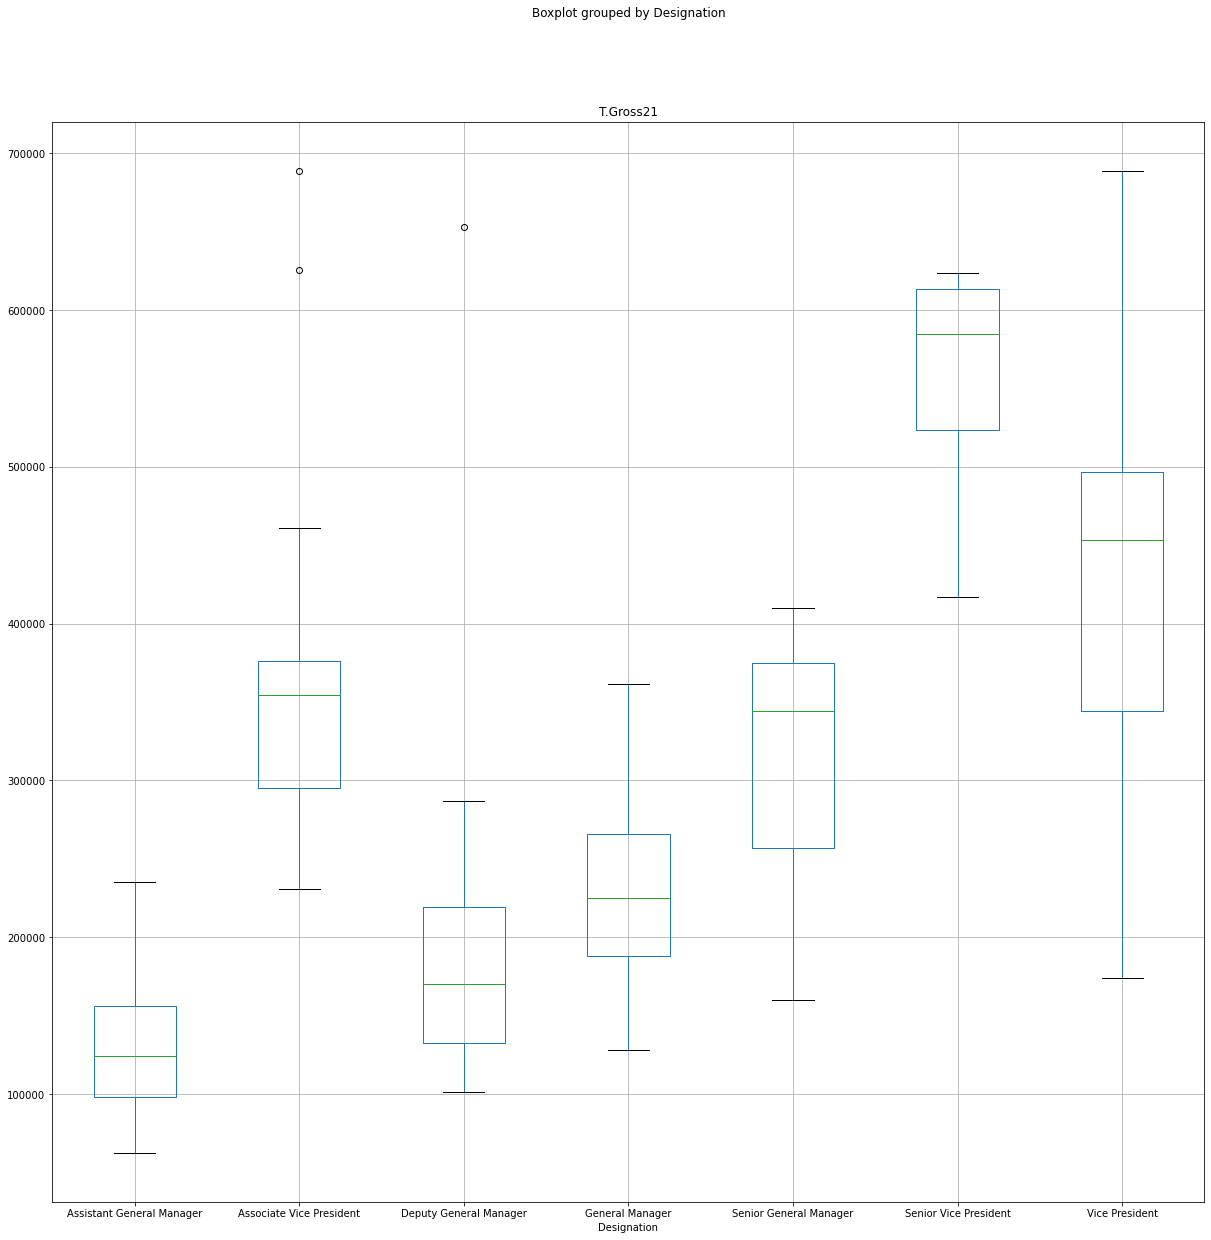

In [14]:
boxplot = data_main.boxplot(column = 'T.Gross21', by = 'Designation',figsize=(20,20))

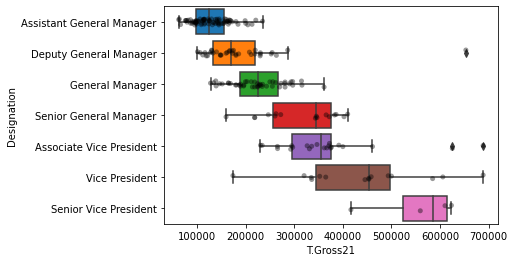

In [15]:
my_order = data_main.loc[:,["Designation","T.Gross21"]].groupby(["Designation"]).median().sort_values(by = 'T.Gross21')
sns.boxplot(x='T.Gross21', y='Designation', data=data_main, order=my_order.index, saturation = 1)
sns.stripplot(x='T.Gross21', y='Designation', data=data_main, color='black', order=my_order.index,alpha=0.4)
plt.show()

### Remove the stripplot function in the above code to neglect insivisual points from the boxplot

In [44]:
#Salary of AGM's and DGM's that are greater than median salary of DGM's
agm_dgm =  data_main.loc[data_main(data_main(data_main["Designation"])["Assistant General Manager"])["T.Gross21"] > data_main(data_main(data_main["Designation"])["Deputy General Manager"])["T.Gross21"].median()]
print(agm_dgm)

TypeError: 'DataFrame' object is not callable